In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("../Data/Mall_Customers.csv")

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [10]:
df = df.values

In [ ]:
## finding wcss value of different number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

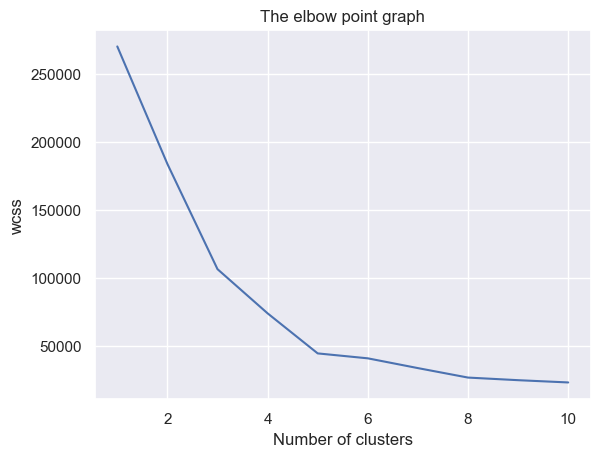

In [12]:
## plot the elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")

In [13]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

In [14]:
## we will choose cluster = 5

Training the data using kmeans

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=0)
y = kmeans.fit_predict(df)
y

Visualizing all the clusters

Text(0, 0.5, 'Spending score')

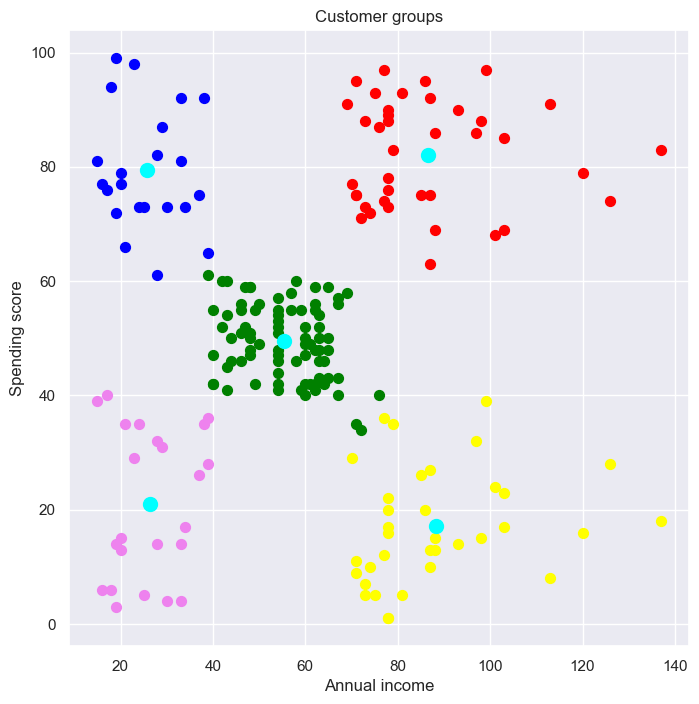

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(df[y==0,0], df[y==0,1], s=50, c='green',label = "Cluster1")
plt.scatter(df[y==1,0], df[y==1,1], s=50, c='red',label = "Cluster2")
plt.scatter(df[y==2,0], df[y==2,1], s=50, c='yellow',label = "Cluster3")
plt.scatter(df[y==3,0], df[y==3,1], s=50, c='violet',label = "Cluster4")
plt.scatter(df[y==4,0], df[y==4,1], s=50, c='blue',label = "Cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label= "Centroids")

plt.title("Customer groups")
plt.xlabel("Annual income")
plt.ylabel("Spending score")